<a href="https://colab.research.google.com/github/danasalem/my-new-repo/blob/main/regression_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Dana Salem

ID:58-4838

Tutorial: 03

---

Name: Mariam el mawardy

ID:59-30017

Tutorial: 03

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [8]:

print("\nDataFrame info():")
df.info()

print("\nColumn names:")
print(df.columns.tolist())


print("\nNumeric summary:")
display(df.describe(include=[np.number]))

print("\nCategorical/text summary (object/category/string):")
display(df.select_dtypes(include=['object','category','string']).describe())


mv = df.isnull().sum().sort_values(ascending=False)
mv_pct = (df.isnull().mean() * 100).round(2)
print("\nMissing values (count):")
display(mv[mv > 0])
print("\nMissing values (percent):")
display(mv_pct[mv_pct > 0])


print("\nDuplicate rows:", df.duplicated().sum())


print("\nUnique values per categorical/text column:")
cat_cols = df.select_dtypes(include=['object','category','string']).columns
for col in cat_cols:

    uniq = df[col].unique()
    n = len(uniq)
    preview = uniq[:20]
    print(f"- {col}: {n} unique values")
    print(f"  sample: {preview}")


DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB

Column names:
['Building_ID', 'Building_Type', 'Governorate', 'Neighborhood', 'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000



Categorical/text summary (object/category/string):


,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Energy_Consumption
count,1100,990,873,1100,1100,1100,1100,1100,1100,1100
unique,1100,3,3,848,42,3,3,1095,727,1100
top,BLD-2099-GL,Residential,Alexandria,Smouha,Sunday,High,Low,49653m2,2024-12-31,4722.59 kWh
freq,1,349,310,45,54,368,381,2,89,1



Missing values (count):


,0
Governorate,227
Building_Type,110
Average_Temperature,110



Missing values (percent):


,0
Building_Type,10.00
Governorate,20.64
Average_Temperature,10.00



Duplicate rows: 0

Unique values per categorical/text column:
- Building_ID: 1100 unique values
  sample: ['BLD-1000-UD' 'BLD-1001-AX' 'BLD-1002-IH' 'BLD-1003-HE' 'BLD-1004-XD'
 'BLD-1005-VX' 'BLD-1006-RC' 'BLD-1007-SN' 'BLD-1008-BA' 'BLD-1009-CG'
 'BLD-1010-HQ' 'BLD-1011-TA' 'BLD-1012-RG' 'BLD-1013-WU' 'BLD-1014-WR'
 'BLD-1015-NH' 'BLD-1016-OS' 'BLD-1017-IZ' 'BLD-1018-AY' 'BLD-1019-ZF']
- Building_Type: 4 unique values
  sample: ['Residential' 'Commercial' 'Industrial' nan]
- Governorate: 4 unique values
  sample: ['Alexandria' 'Giza' 'Cairo' nan]
- Neighborhood: 848 unique values
  sample: ['Smouha' '+Mohandessin14' 'New Cairo' '+92Dokki' '%9New Cairo'
 'Heliopolis_59' 'Gleem(23' '=Mohandessin10' '*36Smouha' 'Heliopolis$34'
 '-92Mohandessin' '(75Mohandessin' ')Gleem25' ')Maadi19' '*34Heliopolis'
 'Gleem_8' ')84Smouha' '-42Gleem' 'Dokki' '*Mohandessin93']
- Day_of_Week: 42 unique values
  sample: ['WeDnesday' 'tuesDAY' 'SunDay' 'TuesDay' 'Monday' 'saturDAY' 'MoNday'
 'FRIDAY' 'SUNDAY

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [9]:
print(" Shape BEFORE cleaning:", df.shape)


duplicates_count = df.duplicated().sum()
print(f" Number of duplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(" Duplicates removed.")
else:
    print(" No duplicate rows found.")
print(" Shape AFTER removing duplicates:", df.shape)


df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace('m2', '', regex=False)
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')

df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', regex=False)
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')


df['Day_of_Week'] = df['Day_of_Week'].astype(str).str.strip().str.lower()
dow_map = {
    'sunday': 'Sunday', 'monday': 'Monday', 'tuesday': 'Tuesday',
    'wednesday': 'Wednesday', 'thursday': 'Thursday', 'friday': 'Friday', 'saturday': 'Saturday'
}
df['Day_of_Week'] = df['Day_of_Week'].map(lambda x: dow_map.get(x, x.title()))


df['Occupancy_Level'] = df['Occupancy_Level'].astype(str).str.capitalize().str.strip()
df['Appliances_Usage_Level'] = df['Appliances_Usage_Level'].astype(str).str.capitalize().str.strip()


df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')


print("\n Missing values BEFORE cleaning:")
print(df.isnull().sum())


num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n Missing values AFTER cleaning:")
print(df.isnull().sum())

print("\n Encoding categorical variables using One-Hot Encoding...")
df_encoded = pd.get_dummies(df, drop_first=True)
print(" Encoding completed.")
print(" Shape AFTER encoding:", df_encoded.shape)


df['Days_Since_Maintenance'] = (pd.Timestamp('today') - df['Last_Maintenance_Date']).dt.days


print("\n Preview of transformed dataset:")
print(df_encoded.head())

 Shape BEFORE cleaning: (1100, 11)
 Number of duplicate rows: 0
 No duplicate rows found.
 Shape AFTER removing duplicates: (1100, 11)

 Missing values BEFORE cleaning:
Building_ID                 0
Building_Type             110
Governorate               227
Neighborhood                0
Day_of_Week                 0
Occupancy_Level             0
Appliances_Usage_Level      0
SquareFootage               0
Last_Maintenance_Date       0
Average_Temperature       110
Energy_Consumption          0
dtype: int64

 Missing values AFTER cleaning:
Building_ID               0
Building_Type             0
Governorate               0
Neighborhood              0
Day_of_Week               0
Occupancy_Level           0
Appliances_Usage_Level    0
SquareFootage             0
Last_Maintenance_Date     0
Average_Temperature       0
Energy_Consumption        0
dtype: int64

 Encoding categorical variables using One-Hot Encoding...
 Encoding completed.
 Shape AFTER encoding: (1100, 1964)

 Preview of trans

## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

 Top 3 Most Popular Neighborhoods:
1. Smouha: 45 buildings
2. Gleem: 44 buildings
3. Dokki: 41 buildings


/tmp/ipython-input-4086686520.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_counts.head(20).index, y=neighborhood_counts.head(20).values, palette="viridis")


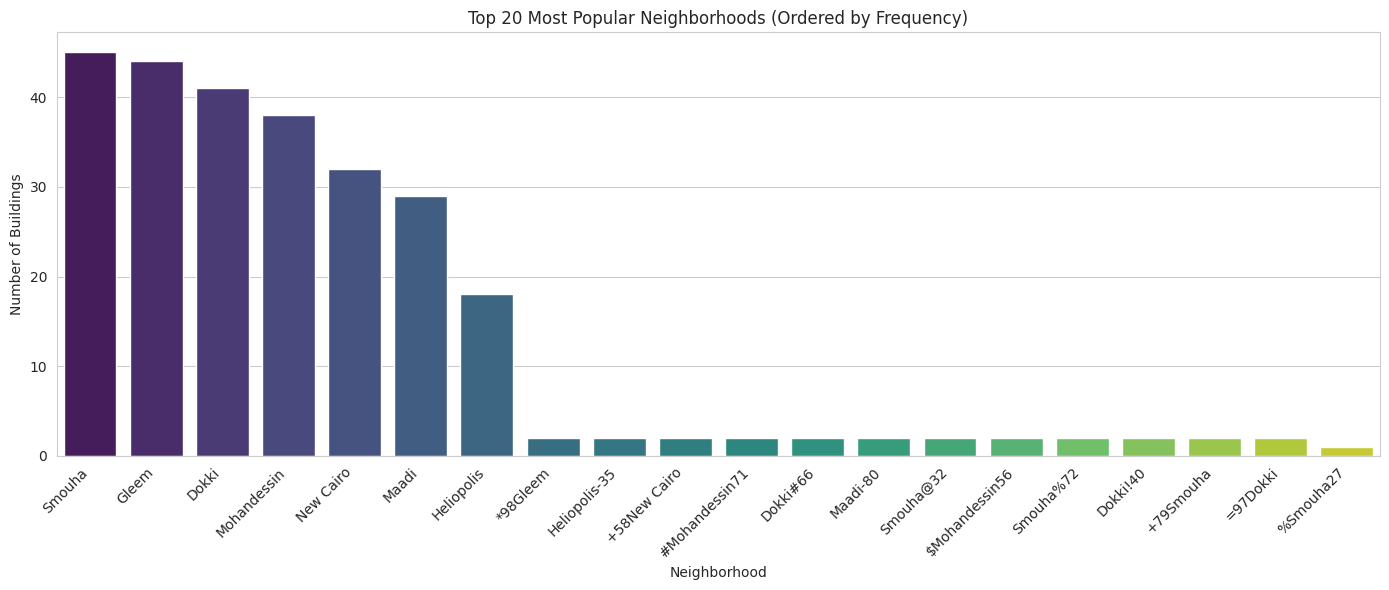

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


neighborhood_counts = df['Neighborhood'].value_counts()


top_3 = neighborhood_counts.head(3)
print(" Top 3 Most Popular Neighborhoods:")
for i, (name, count) in enumerate(top_3.items(), 1):
    print(f"{i}. {name}: {count} buildings")


plt.figure(figsize=(14, 6))
sns.barplot(x=neighborhood_counts.head(20).index, y=neighborhood_counts.head(20).values, palette="viridis")
plt.title("Top 20 Most Popular Neighborhoods (Ordered by Frequency)")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

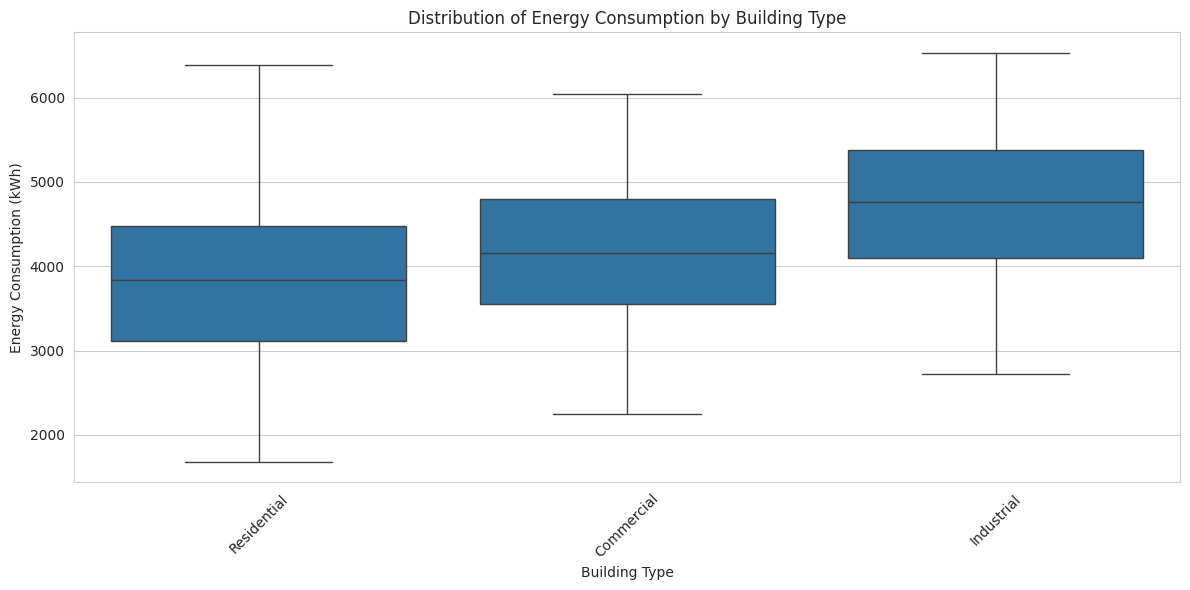

 Average Energy Consumption by Building Type:
 Building_Type
Industrial     4708.418671
Commercial     4170.374462
Residential    3794.724183
Name: Energy_Consumption, dtype: float64

 IQR (Widest Distribution) by Building Type:
 Building_Type
Residential    1367.9250
Industrial     1272.6775
Commercial     1244.0600
Name: Energy_Consumption, dtype: float64

 Building type with highest average consumption: Industrial
 Building type with widest distribution (IQR): Residential


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.boxplot(x='Building_Type', y='Energy_Consumption', data=df)
plt.title('Distribution of Energy Consumption by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_consumption = df.groupby('Building_Type')['Energy_Consumption'].mean().sort_values(ascending=False)

iqr_consumption = df.groupby('Building_Type')['Energy_Consumption'].apply(
    lambda x: x.quantile(0.75) - x.quantile(0.25)
).sort_values(ascending=False)

print(" Average Energy Consumption by Building Type:\n", avg_consumption)
print("\n IQR (Widest Distribution) by Building Type:\n", iqr_consumption)

highest_avg = avg_consumption.index[0]
widest_dist = iqr_consumption.index[0]

print(f"\n Building type with highest average consumption: {highest_avg}")
print(f" Building type with widest distribution (IQR): {widest_dist}")

**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

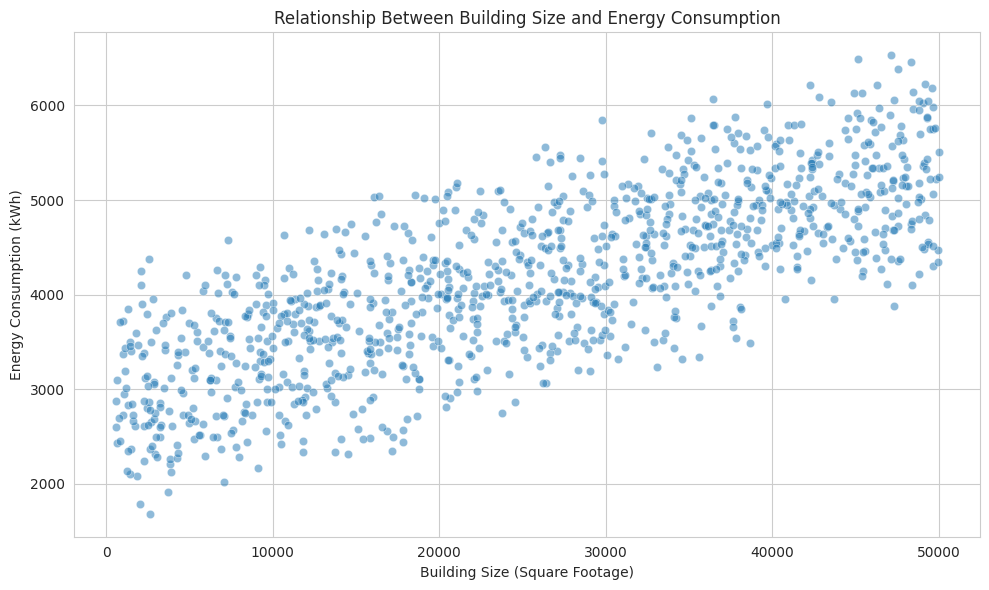

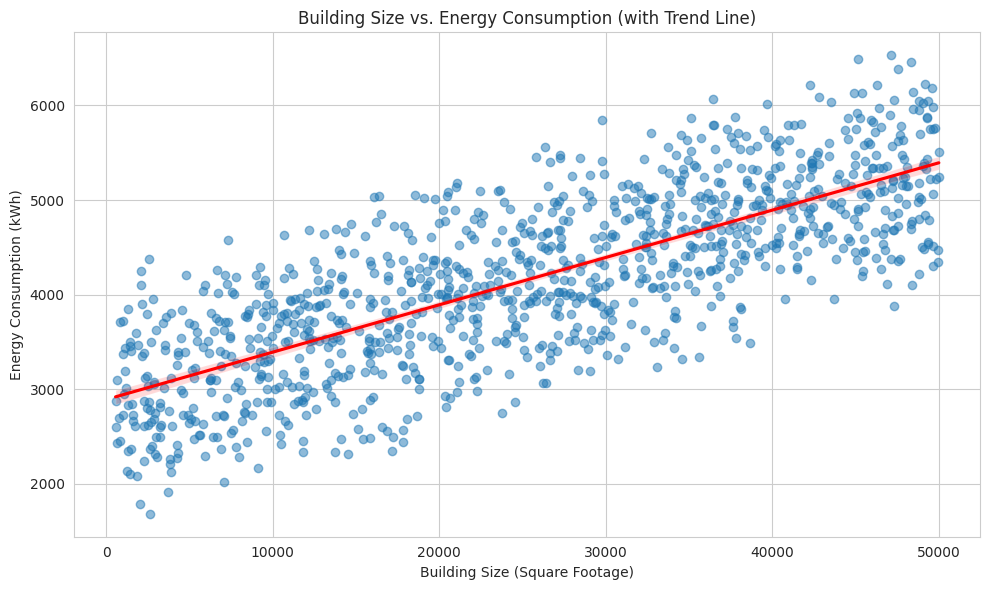

Correlation between building size and energy consumption: 0.771


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFootage', y='Energy_Consumption', data=df, alpha=0.5)
plt.title('Relationship Between Building Size and Energy Consumption')
plt.xlabel('Building Size (Square Footage)')
plt.ylabel('Energy Consumption (kWh)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='SquareFootage', y='Energy_Consumption', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Building Size vs. Energy Consumption (with Trend Line)')
plt.xlabel('Building Size (Square Footage)')
plt.ylabel('Energy Consumption (kWh)')
plt.tight_layout()
plt.show()

corr = df['SquareFootage'].corr(df['Energy_Consumption'])
print(f"Correlation between building size and energy consumption: {corr:.3f}")

**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

/tmp/ipython-input-1428796808.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Maintenance_Frequency', y='Energy_Consumption', data=df, palette='Set2')


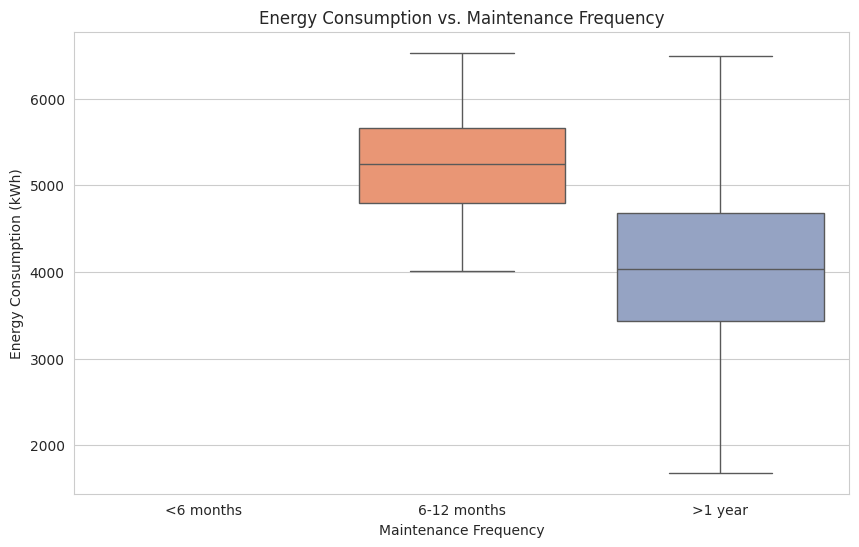

 Average Energy Consumption by Maintenance Frequency:
 Maintenance_Frequency
6-12 months    5213.751140
>1 year        4047.305041
<6 months              NaN
Name: Energy_Consumption, dtype: float64

 Category with highest average energy consumption: 6-12 months


/tmp/ipython-input-1428796808.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_maintenance = df.groupby('Maintenance_Frequency')['Energy_Consumption'].mean().sort_values(ascending=False)


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

if 'Maintenance_Frequency' not in df.columns:
    bins = [0, 180, 365, df['Days_Since_Maintenance'].max()]
    labels = ['<6 months', '6-12 months', '>1 year']
    df['Maintenance_Frequency'] = pd.cut(df['Days_Since_Maintenance'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Maintenance_Frequency', y='Energy_Consumption', data=df, palette='Set2')
plt.title('Energy Consumption vs. Maintenance Frequency')
plt.xlabel('Maintenance Frequency')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

avg_maintenance = df.groupby('Maintenance_Frequency')['Energy_Consumption'].mean().sort_values(ascending=False)
print(" Average Energy Consumption by Maintenance Frequency:\n", avg_maintenance)

highest_maint = avg_maintenance.index[0]
print(f"\n Category with highest average energy consumption: {highest_maint}")

**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

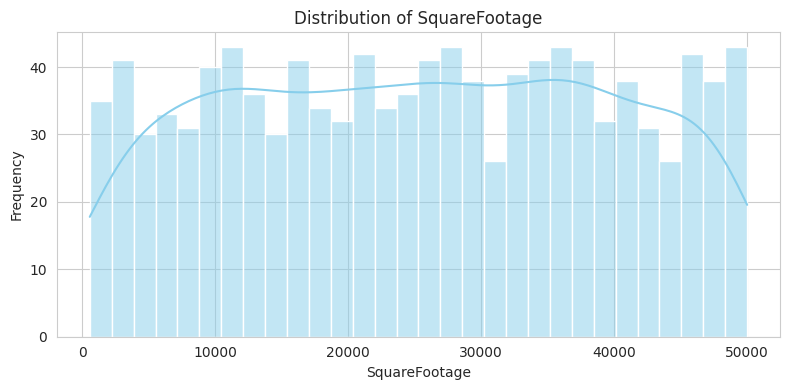

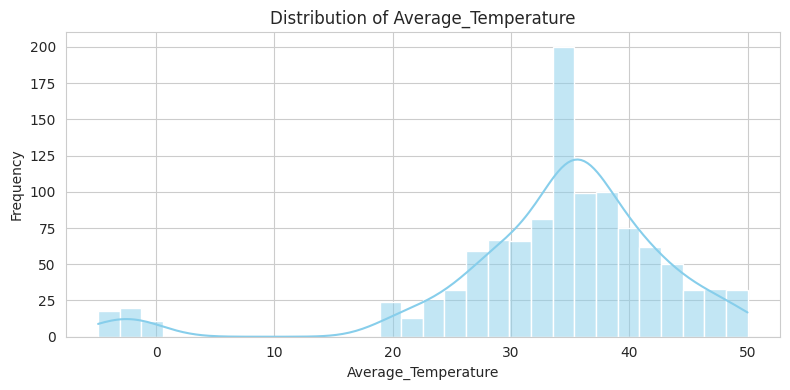

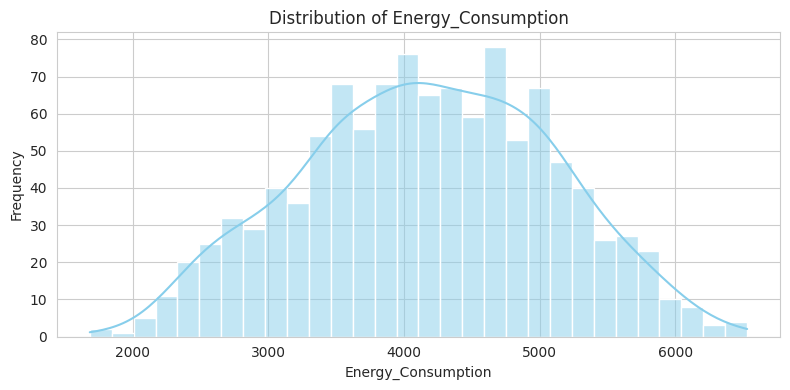

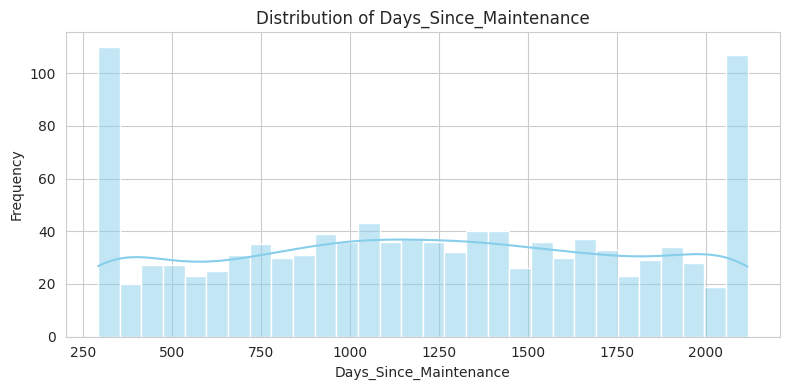


 Skewness values for numerical columns:
SquareFootage            -0.009352
Average_Temperature      -1.837381
Energy_Consumption       -0.060074
Days_Since_Maintenance   -0.016611
dtype: float64

 Interpretation Guide:
 • |Skewness| < 0.5 → Approximately symmetric / near-normal
 • 0.5 ≤ |Skewness| < 1 → Moderately skewed
 • |Skewness| ≥ 1 → Highly skewed


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print("\n Skewness values for numerical columns:")
skewness_values = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print(skewness_values)

print("\n Interpretation Guide:")
print(" • |Skewness| < 0.5 → Approximately symmetric / near-normal")
print(" • 0.5 ≤ |Skewness| < 1 → Moderately skewed")
print(" • |Skewness| ≥ 1 → Highly skewed")

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

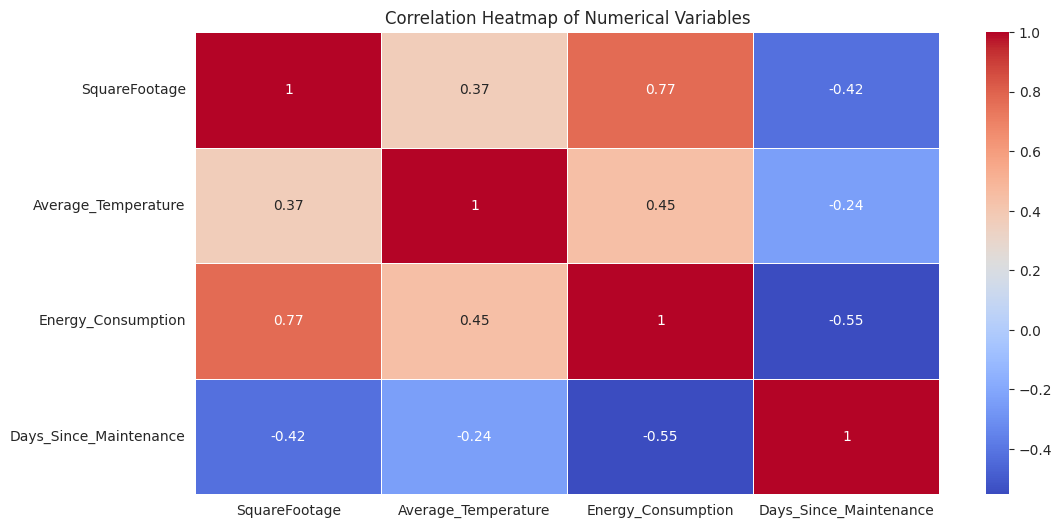


 Variance Inflation Factor (VIF) for numerical features:
                  Feature        VIF
0           SquareFootage   9.107980
1     Average_Temperature  14.381683
2      Energy_Consumption  26.443680
3  Days_Since_Maintenance   3.916375

 Features with VIF > 5 (possible multicollinearity):
               Feature        VIF
0        SquareFootage   9.107980
1  Average_Temperature  14.381683
2   Energy_Consumption  26.443680


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i)
                   for i in range(numeric_df.shape[1])]

print("\n Variance Inflation Factor (VIF) for numerical features:")
print(vif_data)


high_vif = vif_data[vif_data['VIF'] > 5]
if not high_vif.empty:
    print("\n Features with VIF > 5 (possible multicollinearity):")
    print(high_vif)
else:
    print("\n No features with problematic multicollinearity (VIF > 5) detected.")


**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')


df['SquareFootage'] = df['SquareFootage'].astype(str).str.replace('m2', '', regex=False)
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')

df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', regex=False)
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce')

df['Day_of_Week'] = df['Day_of_Week'].astype(str).str.strip().str.lower()
dow_map = {
    'sunday': 'Sunday', 'monday': 'Monday', 'tuesday': 'Tuesday',
    'wednesday': 'Wednesday', 'thursday': 'Thursday', 'friday': 'Friday', 'saturday': 'Saturday'
}
df['Day_of_Week'] = df['Day_of_Week'].map(lambda x: dow_map.get(x, x.title()))

df['Occupancy_Level'] = df['Occupancy_Level'].astype(str).str.capitalize().str.strip()
df['Appliances_Usage_Level'] = df['Appliances_Usage_Level'].astype(str).str.capitalize().str.strip()

df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce')


num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


df['Days_Since_Maintenance'] = (pd.Timestamp('today') - df['Last_Maintenance_Date']).dt.days


print(" Dataset shape BEFORE preparation:", df.shape)


X = df.drop('Energy_Consumption', axis=1)
y = df['Energy_Consumption']

print("\n Target variable: 'Energy_Consumption'")
print(" Features shape:", X.shape)
print(" Target shape:", y.shape)


datetime_cols = X.select_dtypes(include=['datetime64', 'datetime64[ns]']).columns
if len(datetime_cols) > 0:
    print("\n Dropping datetime columns:", list(datetime_cols))
    X = X.drop(datetime_cols, axis=1)


cat_cols = X.select_dtypes(include=['object', 'category']).columns
print("\n Categorical columns to encode:", list(cat_cols))
X = pd.get_dummies(X, drop_first=True)
print("\n Shape AFTER encoding categorical variables:", X.shape)


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("\n Sample of scaled feature data:")
print(X_scaled.head())


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n Data successfully split into training and testing sets.")
print(" Training set shape:", X_train.shape)
print(" Testing set shape:", X_test.shape)
print("\n Preview of X_train:")
print(X_train.head())
print("\n Preview of y_train:")
print(y_train.head())

 Dataset shape BEFORE preparation: (1100, 12)

 Target variable: 'Energy_Consumption'
 Features shape: (1100, 11)
 Target shape: (1100,)

 Dropping datetime columns: ['Last_Maintenance_Date']

 Categorical columns to encode: ['Building_ID', 'Building_Type', 'Governorate', 'Neighborhood', 'Day_of_Week', 'Occupancy_Level', 'Appliances_Usage_Level']

 Shape AFTER encoding categorical variables: (1100, 1963)

 Sample of scaled feature data:
   SquareFootage  Average_Temperature  Days_Since_Maintenance  \
0      -1.295636            -0.498416                1.579984   
1       1.326130             0.155910                0.215619   
2      -0.438884             0.413705                0.853481   
3      -0.859811             0.136231               -0.689903   
4      -0.852081            -0.477753               -0.078111   

   Building_ID_BLD-1001-AX  Building_ID_BLD-1002-IH  Building_ID_BLD-1003-HE  \
0                -0.030165                -0.030165                -0.030165   
1       

## Modelling

_Apply the linear regression model below._

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lin_reg = LinearRegression()


lin_reg.fit(X_train, y_train)


y_pred = lin_reg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R-squared (R²): {r2:.4f}")

 Linear Regression Performance Metrics:
 Mean Squared Error (MSE): 314829.3033
 Root Mean Squared Error (RMSE): 561.0965
 R-squared (R²): 0.6299


## Model Evaluation

Evaluate the model you applied.

 Linear Regression Performance Metrics:
 Mean Squared Error (MSE): 314829.3033
 Root Mean Squared Error (RMSE): 561.0965
 R-squared (R²): 0.6299


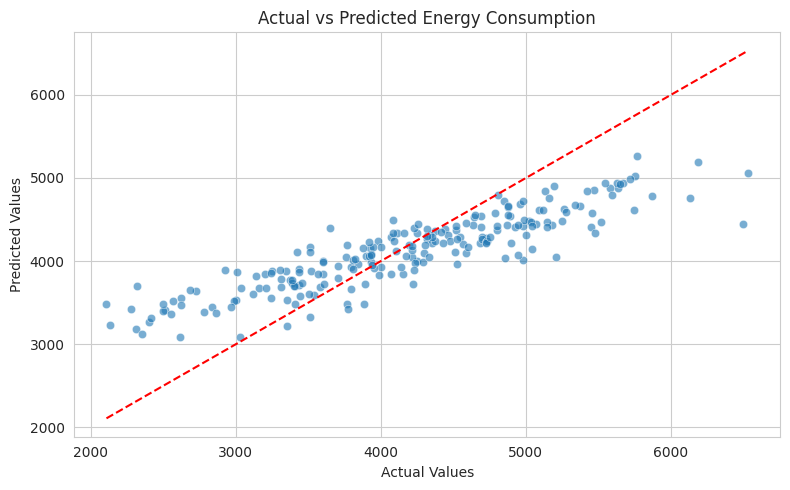

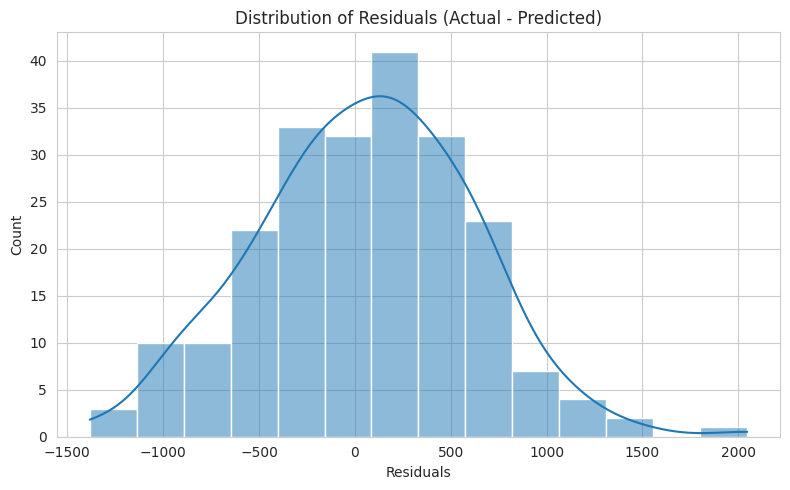

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Performance Metrics:")
print(f" Mean Squared Error (MSE): {mse:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R-squared (R²): {r2:.4f}")


plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')  # Perfect prediction line
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()


residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Actual - Predicted)')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: The Linear Regression model was able to predict energy consumption to some extent, but it was not very accurate. The R² score shows that the model could not fully explain the changes in energy usage, and the RMSE value shows that there is still a noticeable difference between actual and predicted values. From the Actual vs Predicted graph, we could see that some predictions were close to the real values, but many were not. The residuals also showed that there were still errors that the model could not explain.

One reason for this is that energy consumption may depend on more complex patterns that a simple linear model cannot fully capture. Also, some important features may be missing or need better transformation.

To improve the results, we can try more advanced models like Random Forest, Gradient Boosting, or XGBoost, as these can handle non-linear relationships better. We can also create new features or clean the data more carefully.

At this stage, I would not fully recommend using this model for an electricity company because it may not give highly accurate estimates for each building. However, it can be used as a basic starting point, and after improvements and testing with better models, it could become more reliable.

 Training data shape before removing outliers: (880, 1963)
 Training data shape after removing outliers: (880, 1963)

 Linear Regression WITHOUT Outliers - Performance Metrics:
Mean Squared Error (MSE): 314829.3033
Root Mean Squared Error (RMSE): 561.0965
R-squared (R²): 0.6299

 COMPARISON WITH ORIGINAL MODEL:
Original Model MSE: 314829.3033 → No Outliers Model MSE: 314829.3033
Original Model RMSE: 561.0965 → No Outliers Model RMSE: 561.0965
Original Model R²: 0.6299 → No Outliers Model R²: 0.6299


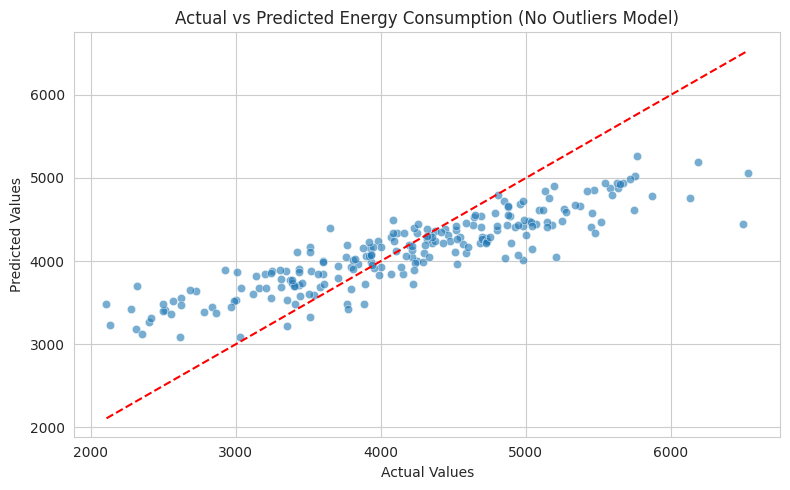

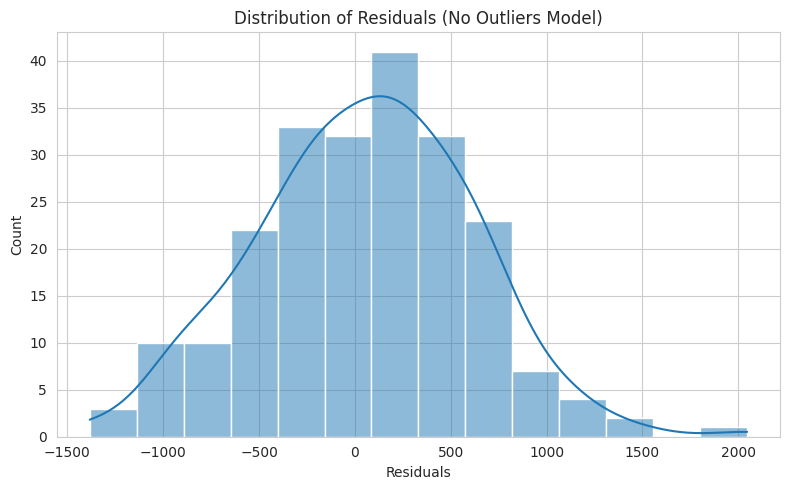

In [19]:


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



def remove_outliers_zscore(X, y, threshold=3.0):

    data = X.copy()
    data['Energy_Consumption'] = y

    z_scores = np.abs((data['Energy_Consumption'] - data['Energy_Consumption'].mean()) / data['Energy_Consumption'].std())

    non_outliers = z_scores < threshold
    return X[non_outliers], y[non_outliers]

X_train_no_outliers, y_train_no_outliers = remove_outliers_zscore(X_train, y_train)

print(f" Training data shape before removing outliers: {X_train.shape}")
print(f" Training data shape after removing outliers: {X_train_no_outliers.shape}")

lin_reg_no_outliers = LinearRegression()
lin_reg_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_no_outliers = lin_reg_no_outliers.predict(X_test)

mse_no_outliers = mean_squared_error(y_test, y_pred_no_outliers)
rmse_no_outliers = mse_no_outliers ** 0.5
r2_no_outliers = r2_score(y_test, y_pred_no_outliers)

print("\n Linear Regression WITHOUT Outliers - Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_no_outliers:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_no_outliers:.4f}")
print(f"R-squared (R²): {r2_no_outliers:.4f}")


print("\n COMPARISON WITH ORIGINAL MODEL:")
print(f"Original Model MSE: {mse:.4f} → No Outliers Model MSE: {mse_no_outliers:.4f}")
print(f"Original Model RMSE: {rmse:.4f} → No Outliers Model RMSE: {rmse_no_outliers:.4f}")
print(f"Original Model R²: {r2:.4f} → No Outliers Model R²: {r2_no_outliers:.4f}")


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_no_outliers, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption (No Outliers Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Residuals plot
residuals_no_outliers = y_test - y_pred_no_outliers
plt.figure(figsize=(8,5))
sns.histplot(residuals_no_outliers, kde=True)
plt.title('Distribution of Residuals (No Outliers Model)')
plt.xlabel('Residuals')
plt.tight_layout()
plt.show()